# Time Series

In [61]:
kings <- scan("http://robjhyndman.com/tsdldata/misc/kings.dat",skip=3)

In [62]:
kings

[1] 60 43 67 50 56 42 50 65 68 43 65 34 47 34 49 41 13 35 53 56 16 43 69 59 48
[26] 59 86 55 68 51 33 49 67 77 81 67 71 81 68 70 77 56

In [63]:
kingstimeseries <- ts(kings)

kingstimeseries

Time Series:
Start = 1 
End = 42 
Frequency = 1 
 [1] 60 43 67 50 56 42 50 65 68 43 65 34 47 34 49 41 13 35 53 56 16 43 69 59 48
[26] 59 86 55 68 51 33 49 67 77 81 67 71 81 68 70 77 56

In [64]:
births <- scan("http://robjhyndman.com/tsdldata/data/nybirths.dat")

In [65]:
births

[1] 26.663 23.598 26.931 24.740 25.806 24.364 24.477 23.901 23.175 23.227
 [11] 21.672 21.870 21.439 21.089 23.709 21.669 21.752 20.761 23.479 23.824
 [21] 23.105 23.110 21.759 22.073 21.937 20.035 23.590 21.672 22.222 22.123
 [31] 23.950 23.504 22.238 23.142 21.059 21.573 21.548 20.000 22.424 20.615
 [41] 21.761 22.874 24.104 23.748 23.262 22.907 21.519 22.025 22.604 20.894
 [51] 24.677 23.673 25.320 23.583 24.671 24.454 24.122 24.252 22.084 22.991
 [61] 23.287 23.049 25.076 24.037 24.430 24.667 26.451 25.618 25.014 25.110
 [71] 22.964 23.981 23.798 22.270 24.775 22.646 23.988 24.737 26.276 25.816
 [81] 25.210 25.199 23.162 24.707 24.364 22.644 25.565 24.062 25.431 24.635
 [91] 27.009 26.606 26.268 26.462 25.246 25.180 24.657 23.304 26.982 26.199
[101] 27.210 26.122 26.706 26.878 26.152 26.379 24.712 25.688 24.990 24.239
[111] 26.721 23.475 24.767 26.219 28.361 28.599 27.914 27.784 25.693 26.881
[121] 26.217 24.218 27.914 26.975 28.527 27.139 28.982 28.169 28.056 29.136
[131] 26.291 26.987 26.589 24.848 27.543 26.896 28.878 27.390 28.065 28.141
[141] 29.048 28.484 26.634 27.735 27.132 24.924 28.963 26.589 27.931 28.009
[151] 29.229 28.759 28.405 27.945 25.912 26.619 26.076 25.286 27.660 25.951
[161] 26.398 25.565 28.865 30.000 29.261 29.012 26.992 27.897

In [66]:
length(births)

[1] 168

In [67]:
birthtimeseries <- ts(births, frequency=12, start=c(1946, 1))

birthtimeseries

        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
1946 26.663 23.598 26.931 24.740 25.806 24.364 24.477 23.901 23.175 23.227
1947 21.439 21.089 23.709 21.669 21.752 20.761 23.479 23.824 23.105 23.110
1948 21.937 20.035 23.590 21.672 22.222 22.123 23.950 23.504 22.238 23.142
1949 21.548 20.000 22.424 20.615 21.761 22.874 24.104 23.748 23.262 22.907
1950 22.604 20.894 24.677 23.673 25.320 23.583 24.671 24.454 24.122 24.252
1951 23.287 23.049 25.076 24.037 24.430 24.667 26.451 25.618 25.014 25.110
1952 23.798 22.270 24.775 22.646 23.988 24.737 26.276 25.816 25.210 25.199
1953 24.364 22.644 25.565 24.062 25.431 24.635 27.009 26.606 26.268 26.462
1954 24.657 23.304 26.982 26.199 27.210 26.122 26.706 26.878 26.152 26.379
1955 24.990 24.239 26.721 23.475 24.767 26.219 28.361 28.599 27.914 27.784
1956 26.217 24.218 27.914 26.975 28.527 27.139 28.982 28.169 28.056 29.136
1957 26.589 24.848 27.543 26.896 28.878 27.390 28.065 28.141 29.048 28.484
1958 27.132 24.924 28.963

In [68]:
souvenir <- scan("http://robjhyndman.com/tsdldata/data/fancy.dat")

In [69]:
souvenir

[1]   1664.81   2397.53   2840.71   3547.29   3752.96   3714.74   4349.61
 [8]   3566.34   5021.82   6423.48   7600.60  19756.21   2499.81   5198.24
[15]   7225.14   4806.03   5900.88   4951.34   6179.12   4752.15   5496.43
[22]   5835.10  12600.08  28541.72   4717.02   5702.63   9957.58   5304.78
[29]   6492.43   6630.80   7349.62   8176.62   8573.17   9690.50  15151.84
[36]  34061.01   5921.10   5814.58  12421.25   6369.77   7609.12   7224.75
[43]   8121.22   7979.25   8093.06   8476.70  17914.66  30114.41   4826.64
[50]   6470.23   9638.77   8821.17   8722.37  10209.48  11276.55  12552.22
[57]  11637.39  13606.89  21822.11  45060.69   7615.03   9849.69  14558.40
[64]  11587.33   9332.56  13082.09  16732.78  19888.61  23933.38  25391.35
[71]  36024.80  80721.71  10243.24  11266.88  21826.84  17357.33  15997.79
[78]  18601.53  26155.15  28586.52  30505.41  30821.33  46634.38 104660.67

In [70]:
souvenirtimeseries <- ts(souvenir, frequency=12, start=c(1978,1))
souvenirtimeseries

           Jan       Feb       Mar       Apr       May       Jun       Jul
1978   1664.81   2397.53   2840.71   3547.29   3752.96   3714.74   4349.61
1979   2499.81   5198.24   7225.14   4806.03   5900.88   4951.34   6179.12
1980   4717.02   5702.63   9957.58   5304.78   6492.43   6630.80   7349.62
1981   5921.10   5814.58  12421.25   6369.77   7609.12   7224.75   8121.22
1982   4826.64   6470.23   9638.77   8821.17   8722.37  10209.48  11276.55
1983   7615.03   9849.69  14558.40  11587.33   9332.56  13082.09  16732.78
1984  10243.24  11266.88  21826.84  17357.33  15997.79  18601.53  26155.15
           Aug       Sep       Oct       Nov       Dec
1978   3566.34   5021.82   6423.48   7600.60  19756.21
1979   4752.15   5496.43   5835.10  12600.08  28541.72
1980   8176.62   8573.17   9690.50  15151.84  34061.01
1981   7979.25   8093.06   8476.70  17914.66  30114.41
1982  12552.22  11637.39  13606.89  21822.11  45060.69
1983  19888.61  23933.38  25391.35  36024.80  80721.71
1984  28586.52 

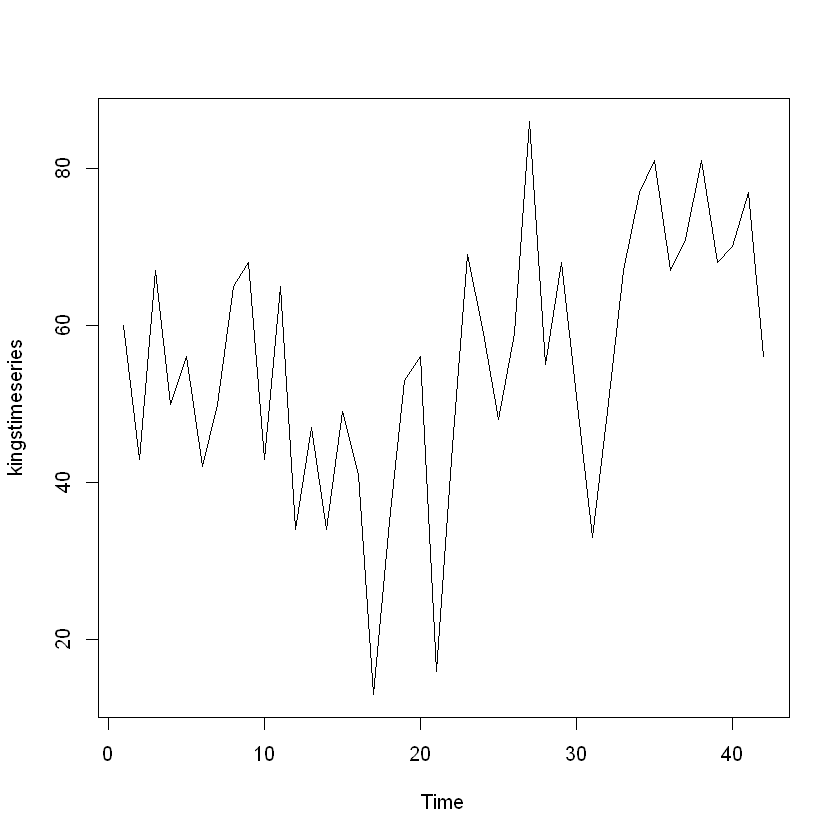

In [71]:
plot.ts(kingstimeseries)

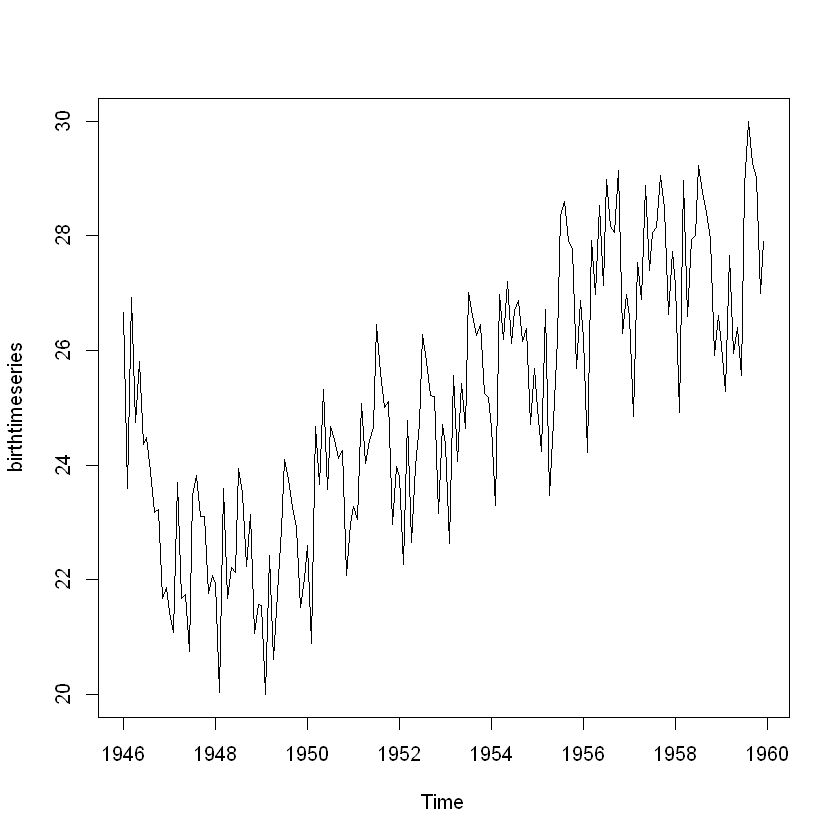

In [72]:
plot.ts(birthtimeseries)

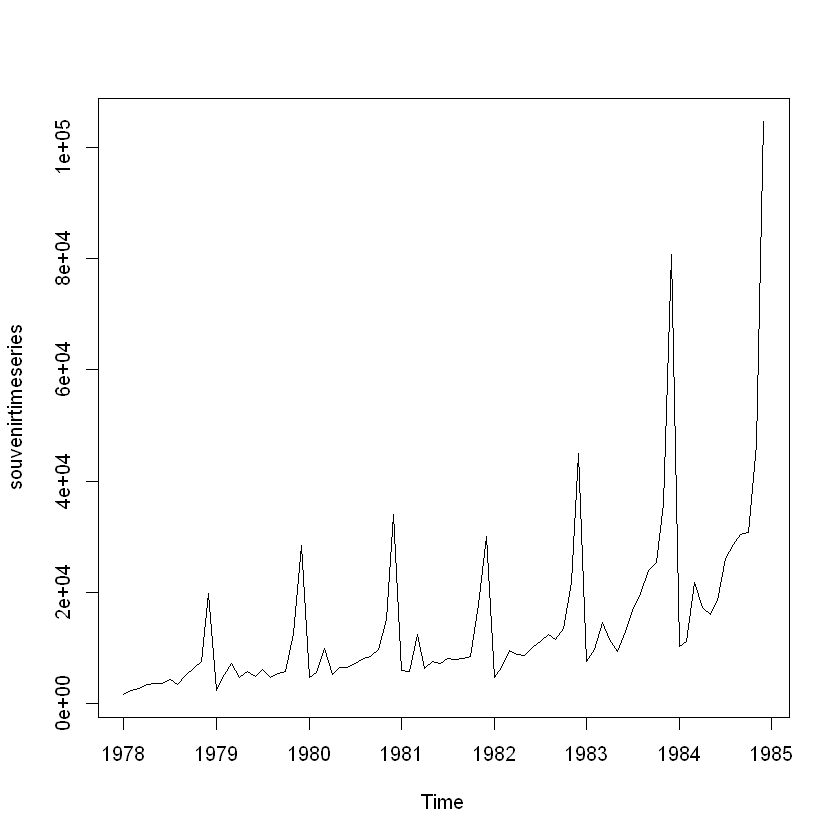

In [73]:
plot.ts(souvenirtimeseries)

Not an additive time series. Let's transform it in order to get a transformed time series that can be described using an additive model.

In [74]:
souvenirtimeseries_logged <- log(souvenirtimeseries)
souvenirtimeseries_logged

           Jan       Feb       Mar       Apr       May       Jun       Jul
1978  7.417466  7.782194  7.951809  8.173939  8.230300  8.220064  8.377841
1979  7.823970  8.556075  8.885322  8.477627  8.682857  8.507414  8.728931
1980  8.458933  8.648683  9.206089  8.576364  8.778392  8.799481  8.902404
1981  8.686278  8.668124  9.427164  8.759319  8.937103  8.885268  9.002236
1982  8.481906  8.774967  9.173549  9.084910  9.073646  9.231072  9.330481
1983  8.937879  9.195195  9.585923  9.357668  9.141265  9.478999  9.725125
1984  9.234373  9.329623  9.990896  9.761770  9.680206  9.830999 10.171801
           Aug       Sep       Oct       Nov       Dec
1978  8.179295  8.521548  8.767715  8.935982  9.891223
1979  8.466352  8.611854  8.671647  9.441458 10.259122
1980  9.009034  9.056393  9.178901  9.625877 10.435909
1981  8.984600  8.998762  9.045077  9.793375 10.312759
1982  9.437653  9.361978  9.518332  9.990679 10.715766
1983  9.897902 10.083029 10.142164 10.491963 11.298763
1984 10.260691 

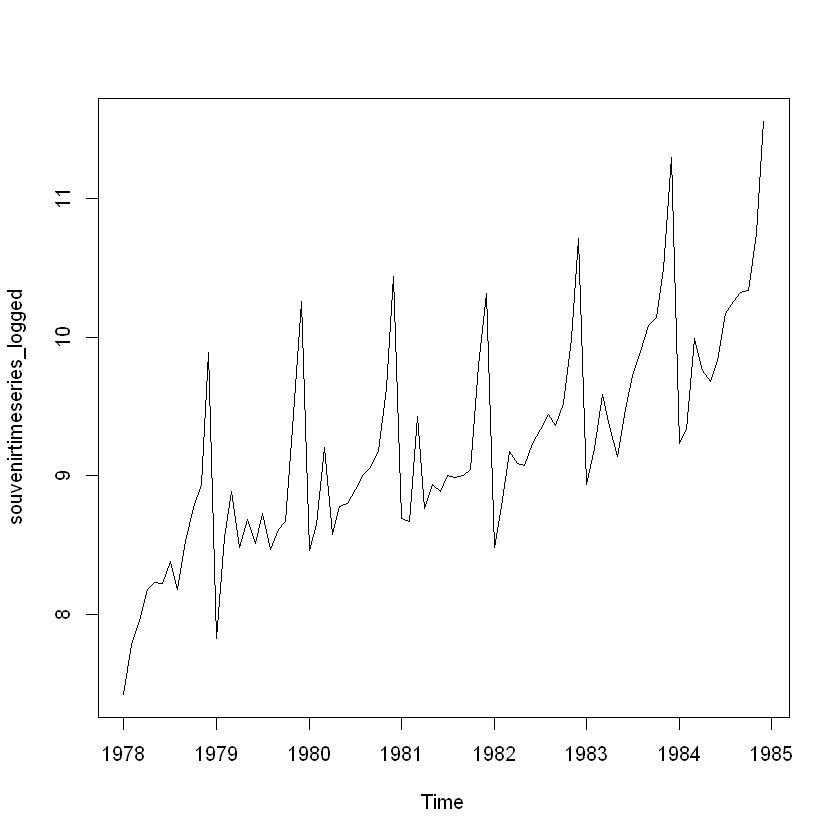

In [75]:
plot.ts(souvenirtimeseries_logged)

Here we can see that the size of the seasonal fluctuations and random fluctuations in the log-transformed time series seem to be roughly constant over time and do not depend on the level of the time series. Thus, the log-transformed time series can probably be described using an additive model

# Decomposing Non-Seasonal Data

In [76]:
library("TTR")

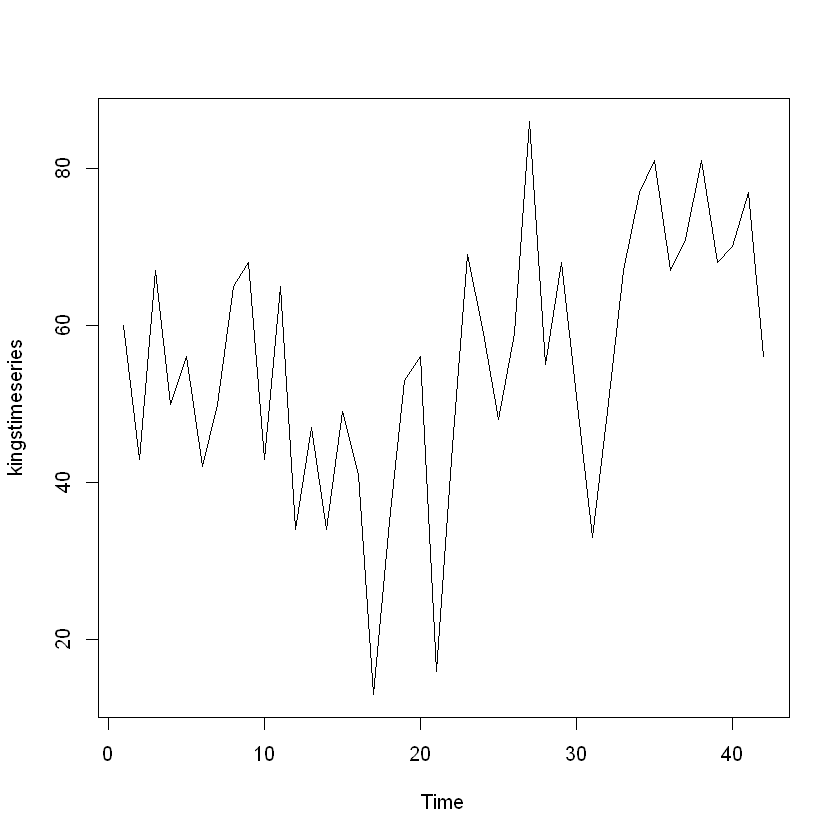

In [77]:
plot.ts(kingstimeseries)

We can try to estimate the trend component of this time series by smoothing using a simple moving average. To smooth the time series using a SMA order of 3...

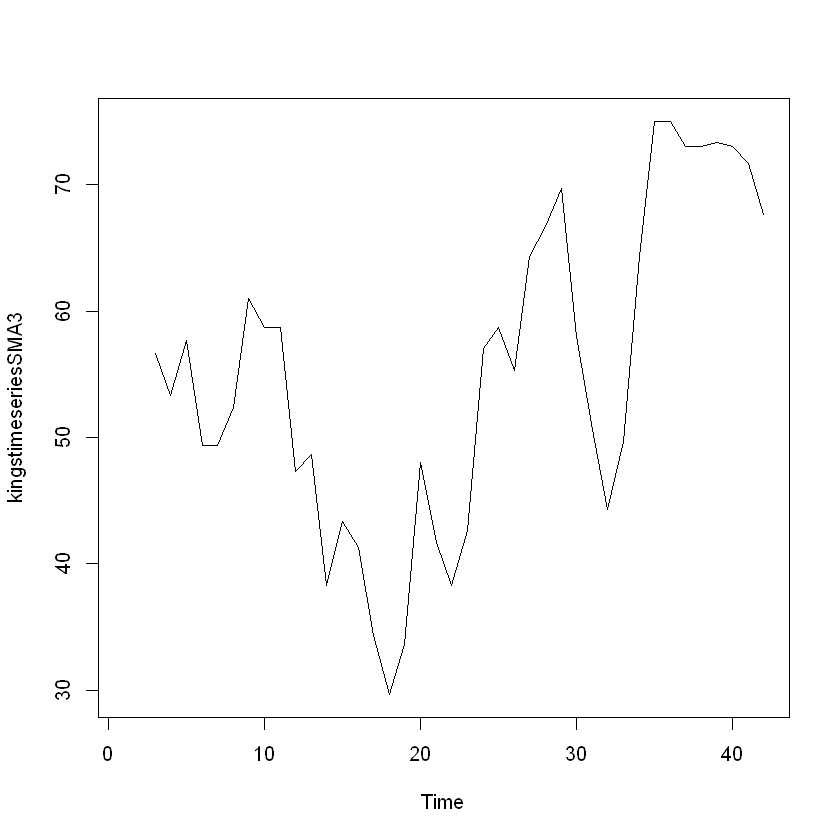

In [78]:
kingstimeseriesSMA3 <- SMA(kingstimeseries, n = 3)
plot.ts(kingstimeseriesSMA3)

There's still quite a bit of random fluctuations in the ts that's smoothed using a simple moving average of order 3. To estimate the trend component more accurately, we might want to try smoothing the data with a simple moving average of a higher order. 

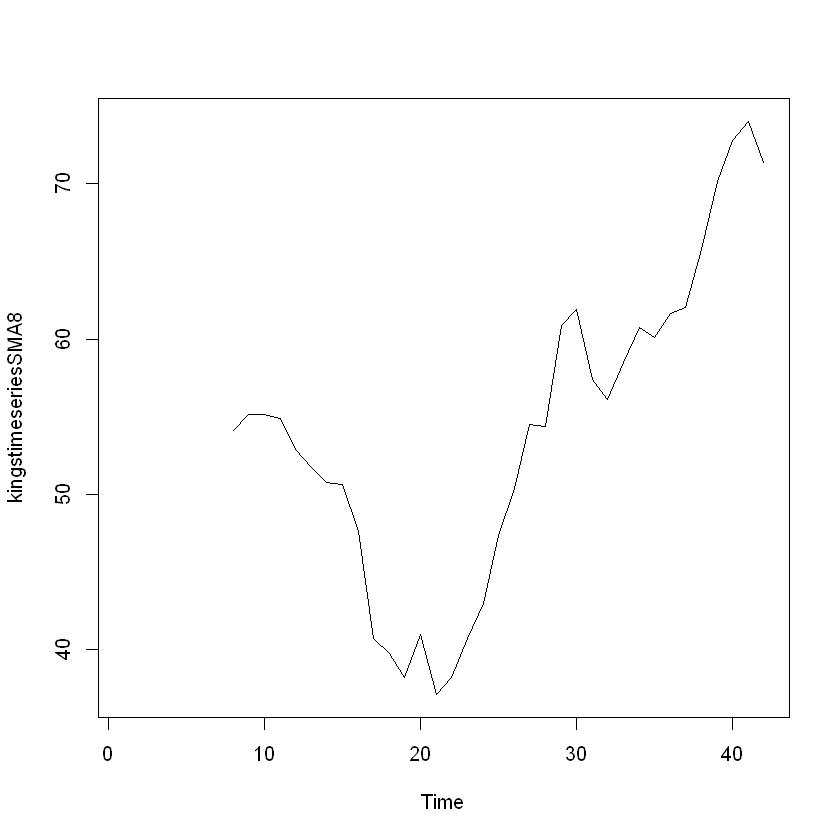

In [79]:
kingstimeseriesSMA8 <- SMA(kingstimeseries,n=8)
plot.ts(kingstimeseriesSMA8)

An order of 8 gives a clearer picture of the trend component and we can see that the age of death of the English kings seems to have decreased from about 55 years old to about 38 years old during the reign of the first 20 kings then icnreased to about 73 years old by the end of the 40th king era. 

# Decomposing Seasonal Data

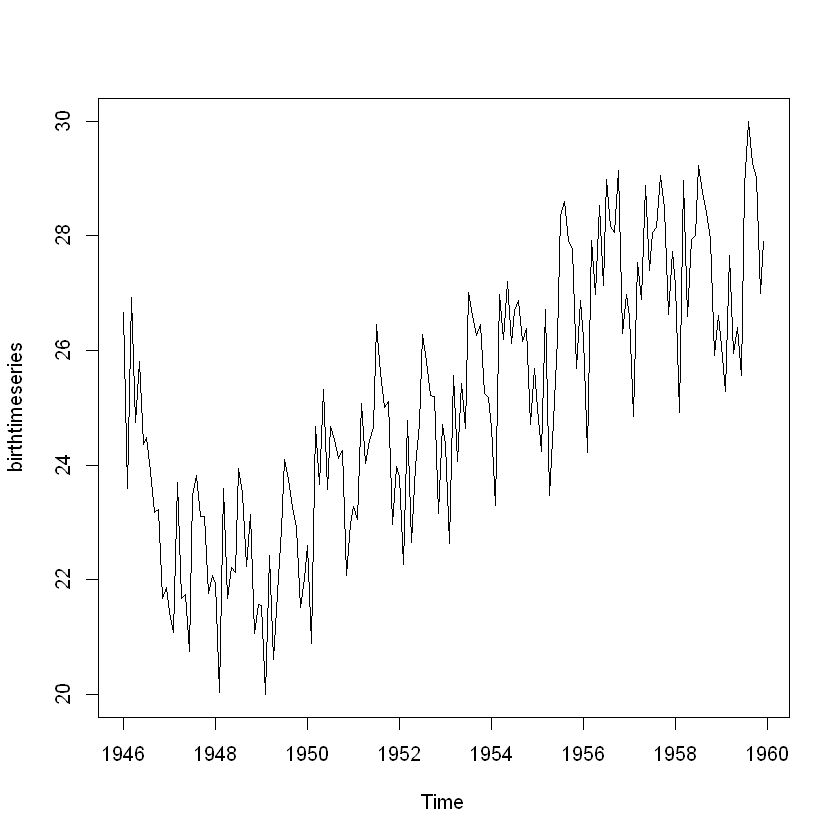

In [80]:
plot.ts(birthtimeseries)

In [81]:
birthstimeseriescomponents <- decompose(birthtimeseries)

The estimated values of the seasonal, trend and irregular components are now stored in variables birthstimeseriescomponents$seasonal, birthstimeseriescomponents$trend and birthstimeseriescomponents$random.

In [82]:
names(birthstimeseriescomponents)

[1] "x"        "seasonal" "trend"    "random"   "figure"   "type"

In [85]:
# get the estimated values of the seasonal component
birthstimeseriescomponents$seasonal

            Jan        Feb        Mar        Apr        May        Jun
1946 -0.6771947 -2.0829607  0.8625232 -0.8016787  0.2516514 -0.1532556
1947 -0.6771947 -2.0829607  0.8625232 -0.8016787  0.2516514 -0.1532556
1948 -0.6771947 -2.0829607  0.8625232 -0.8016787  0.2516514 -0.1532556
1949 -0.6771947 -2.0829607  0.8625232 -0.8016787  0.2516514 -0.1532556
1950 -0.6771947 -2.0829607  0.8625232 -0.8016787  0.2516514 -0.1532556
1951 -0.6771947 -2.0829607  0.8625232 -0.8016787  0.2516514 -0.1532556
1952 -0.6771947 -2.0829607  0.8625232 -0.8016787  0.2516514 -0.1532556
1953 -0.6771947 -2.0829607  0.8625232 -0.8016787  0.2516514 -0.1532556
1954 -0.6771947 -2.0829607  0.8625232 -0.8016787  0.2516514 -0.1532556
1955 -0.6771947 -2.0829607  0.8625232 -0.8016787  0.2516514 -0.1532556
1956 -0.6771947 -2.0829607  0.8625232 -0.8016787  0.2516514 -0.1532556
1957 -0.6771947 -2.0829607  0.8625232 -0.8016787  0.2516514 -0.1532556
1958 -0.6771947 -2.0829607  0.8625232 -0.8016787  0.2516514 -0.1532556
1959 -

The estimated seasonal factors are given for the months January-December, and are the same for each year. The largest seasonal factor is for July (about 1.46), and the lowest is for February (about -2.08), indicating that there seems to be a peak in births in July and a trough in births in February each year.

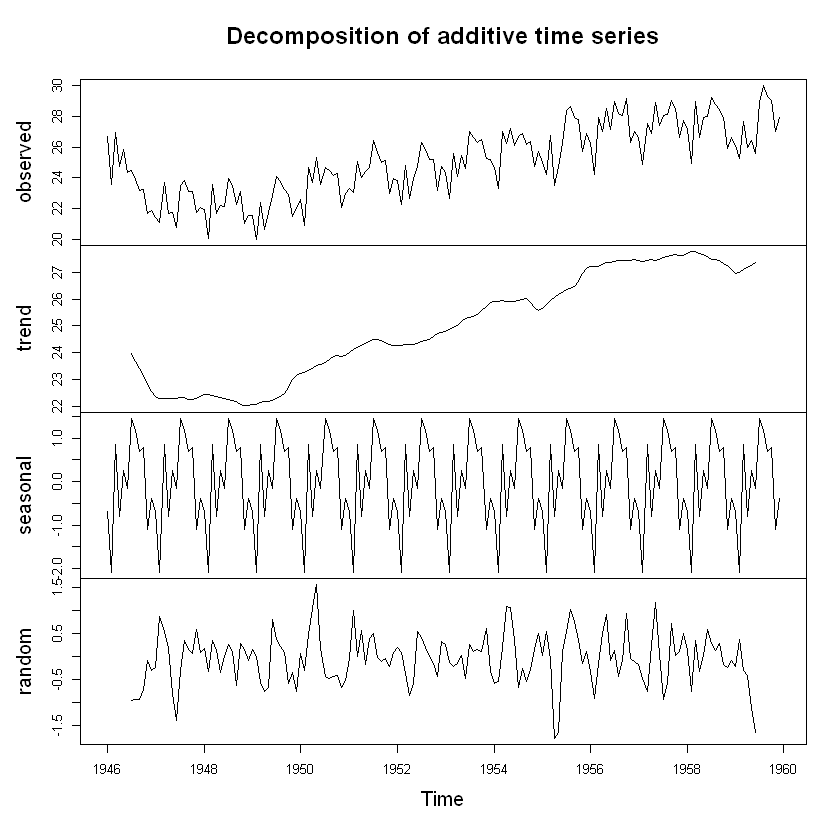

In [84]:
plot(birthstimeseriescomponents)

The plot above shows the original time series (top), the estimated trend component (second from top), the estimated seasonal component (third from top), and the estimated irregular component (bottom). We see that the estimated trend component shows a small decrease from about 24 in 1947 to about 22 in 1948, followed by a steady increase from then on to about 27 in 1959.

## Seasonally Adjusting
If you have a seasonal time series that can be described using an additive model, you can seasonally adjust the time series by estimating the seasonal component, and subtracting the estimated seasonal component from the original time series. We can do this using the estimate of the seasonal component calculated by the “decompose()” function.

For example, to seasonally adjust the time series of the number of births per month in New York city, we can estimate the seasonal component using “decompose()”, and then subtract the seasonal component from the original time series:

In [88]:
birthstimeseriescomponents <- decompose(birthtimeseries)
birthstimeseriesseasonallyadjusted <- birthtimeseries - birthstimeseriescomponents$seasonal

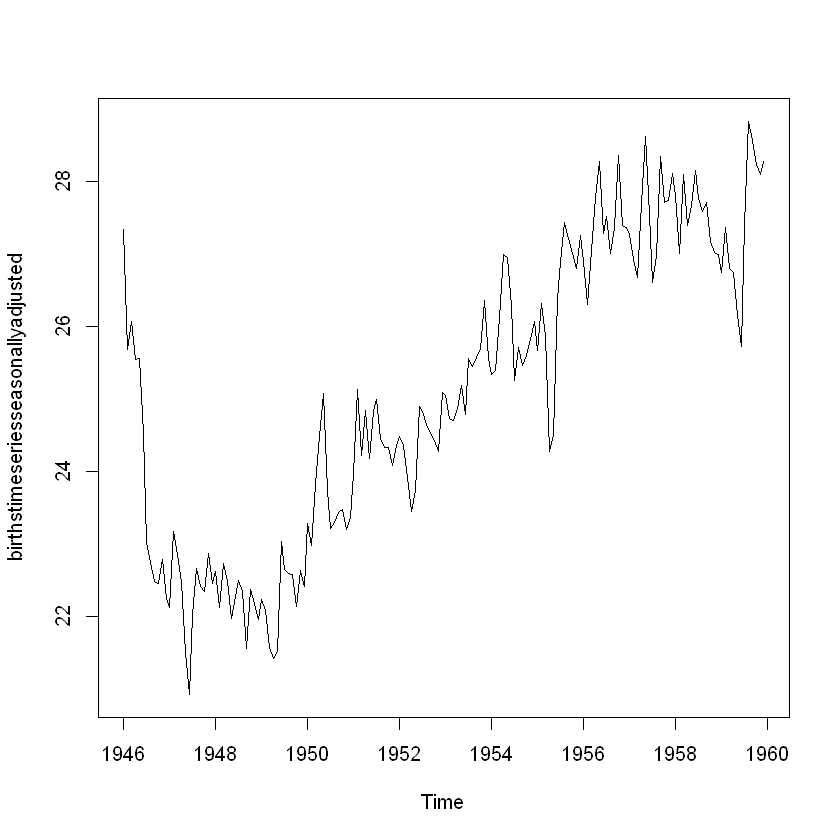

In [89]:
plot(birthstimeseriesseasonallyadjusted)

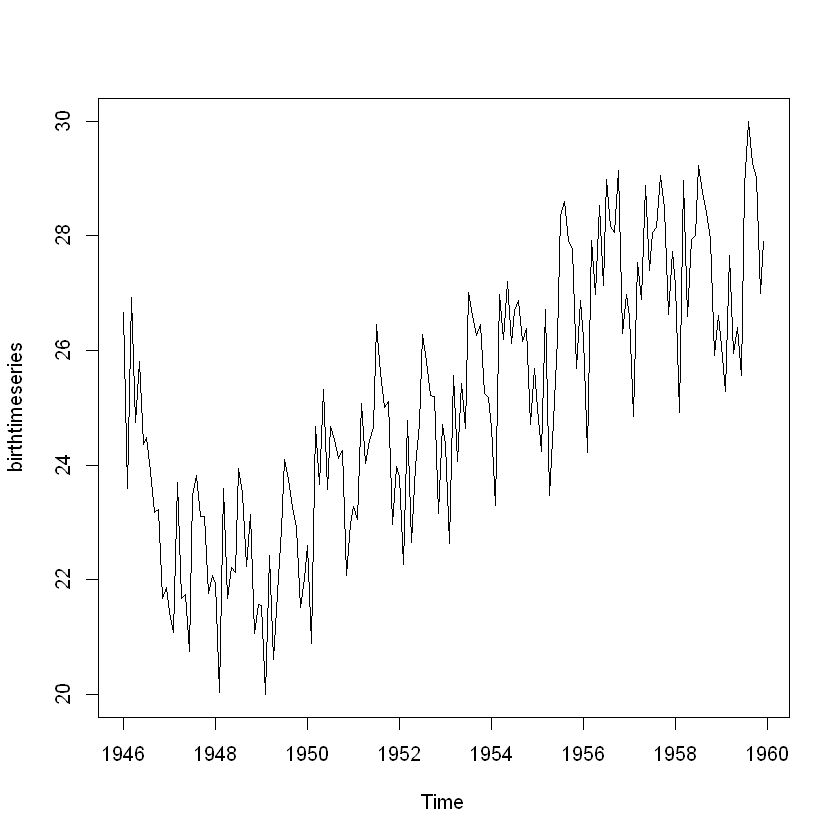

In [92]:
plot(birthtimeseries)

###  Forecasts using Exponential Smoothing
Exponential smoothing can be used to make short-term forecasts for time series data.

#### Simple Exponential Smoothing

If you have a time series that can be described using an additive model with constant level and no seasonality, you can use simple exponential smoothing to make short-term forecasts.

The simple exponential smoothing method provides a way of estimating the level at the current time point. Smoothing is controlled by the parameter alpha; for the estimate of the level at the current time point. The value of alpha; lies between 0 and 1. Values of alpha that are close to 0 mean that little weight is placed on the most recent observations when making forecasts of future values.

In [93]:
rain <- scan("http://robjhyndman.com/tsdldata/hurst/precip1.dat",skip=1)

In [98]:
rainseries <- ts(rain, start=c(1813))

In [95]:
rainseries

Time Series:
Start = 1813 
End = 1912 
Frequency = 1 
  [1] 23.56 26.07 21.86 31.24 23.65 23.88 26.41 22.67 31.69 23.86 24.11 32.43
 [13] 23.26 22.57 23.00 27.88 25.32 25.08 27.76 19.82 24.78 20.12 24.34 27.42
 [25] 19.44 21.63 27.49 19.43 31.13 23.09 25.85 22.65 22.75 26.36 17.70 29.81
 [37] 22.93 19.22 20.63 35.34 25.89 18.65 23.06 22.21 22.18 18.77 28.21 32.24
 [49] 22.27 27.57 21.59 16.93 29.48 31.60 26.25 23.40 25.42 21.32 25.02 33.86
 [61] 22.67 18.82 28.44 26.16 28.17 34.08 33.82 30.28 27.92 27.14 24.40 20.35
 [73] 26.64 27.01 19.21 27.74 23.85 21.23 28.15 22.61 19.80 27.94 21.47 23.52
 [85] 22.86 17.69 22.54 23.28 22.17 20.84 38.10 20.65 22.97 24.26 23.01 23.67
 [97] 26.75 25.36 24.79 27.88

In [99]:
length(rain)

[1] 100

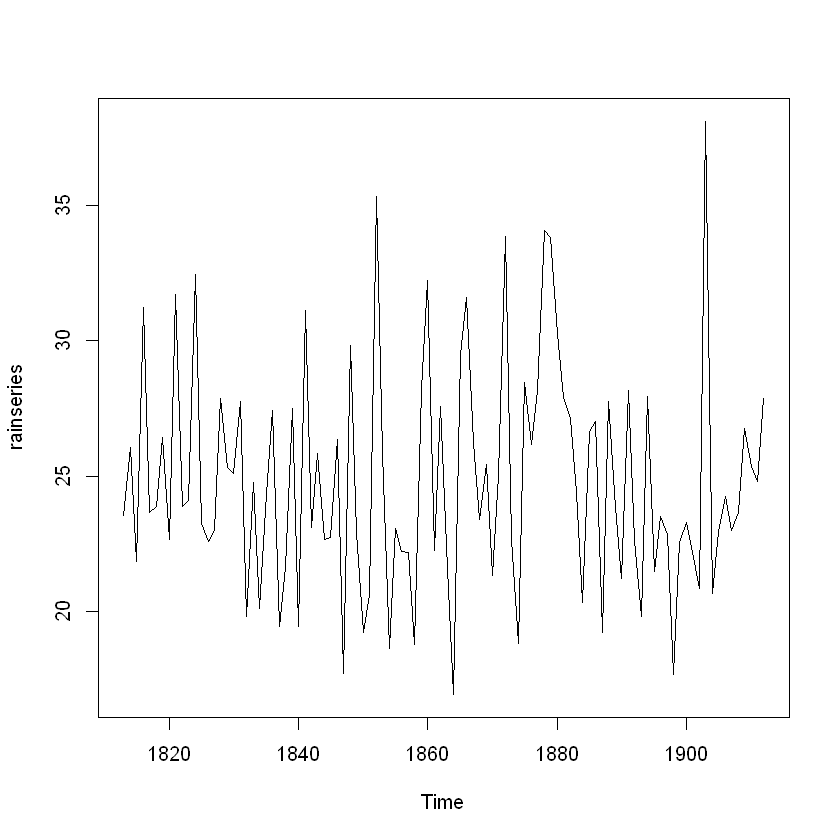

In [100]:
plot.ts(rainseries)

You can see from the plot that there is roughly constant level (the mean stays constant at about 25 inches). The random fluctuations in the time series seem to be roughly constant in size over time, so it is probably appropriate to describe the data using an additive model. Thus, we can make forecasts using simple exponential smoothing.

To make forecasts using simple exponential smoothing in R, we can fit a simple exponential smoothing predictive model using the “HoltWinters()” function in R. To use HoltWinters() for simple exponential smoothing, we need to set the parameters beta=FALSE and gamma=FALSE in the HoltWinters() function (the beta and gamma parameters are used for Holt’s exponential smoothing, or Holt-Winters exponential smoothing, as described below).

In [102]:
rainseriesforecasts <- HoltWinters(rainseries, beta=FALSE, gamma=FALSE)

rainseriesforecasts

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = rainseries, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.02412151
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 24.67819

The output of HoltWinters() tells us that the estimated value of the alpha parameter is about 0.024. This is very close to zero, telling us that the forecasts are based on both recent and less recent observations (although somewhat more weight is placed on recent observations).

By default, HoltWinters() just makes forecasts for the same time period covered by our original time series. In this case, our original time series included rainfall for London from 1813-1912, so the forecasts are also for 1813-1912.

In the example above, we have stored the output of the HoltWinters() function in the list variable “rainseriesforecasts”. The forecasts made by HoltWinters() are stored in a named element of this list variable called “fitted”, so we can get their values by typing:

In [103]:
names(rainseriesforecasts)

[1] "fitted"       "x"            "alpha"        "beta"         "gamma"       
[6] "coefficients" "seasonal"     "SSE"          "call"

In [107]:
rainseriesforecasts$fitted

xhat,level
23.56000,23.56000
23.62054,23.62054
23.57808,23.57808
23.76290,23.76290
23.76017,23.76017
23.76306,23.76306
23.82691,23.82691
23.79900,23.79900
23.98935,23.98935
23.98623,23.98623


We can plot the original time series against the forecasts by typing:

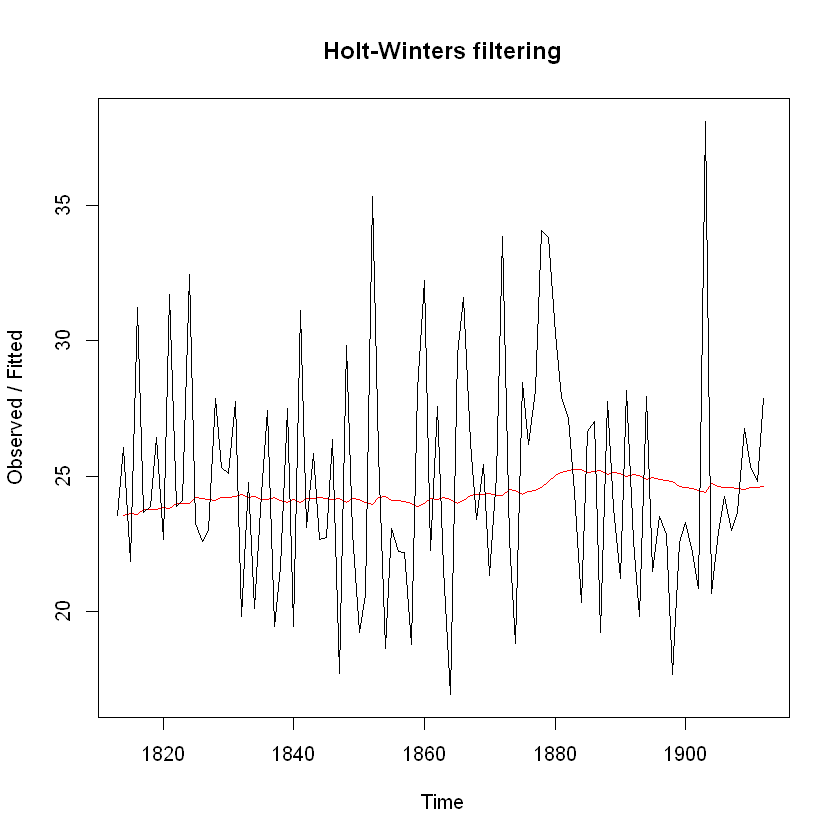

In [106]:
plot(rainseriesforecasts)

The plot shows the original time series in black, and the forecasts as a red line. The time series of forecasts is much smoother than the time series of the original data here.

As a measure of the accuracy of the forecasts, we can calculate the sum of squared errors for the in-sample forecast errors, that is, the forecast errors for the time period covered by our original time series. The sum-of-squared-errors is stored in a named element of the list variable “rainseriesforecasts” called “SSE”, so we can get its value by typing:

In [108]:
rainseriesforecasts$SSE

[1] 1828.855

That is, here the sum-of-squared-errors is 1828.855.

It is common in simple exponential smoothing to use the first value in the time series as the initial value for the level. For example, in the time series for rainfall in London, the first value is 23.56 (inches) for rainfall in 1813. You can specify the initial value for the level in the HoltWinters() function by using the “l.start” parameter. For example, to make forecasts with the initial value of the level set to 23.56, we type:

In [110]:
rain

[1] 23.56 26.07 21.86 31.24 23.65 23.88 26.41 22.67 31.69 23.86 24.11 32.43
 [13] 23.26 22.57 23.00 27.88 25.32 25.08 27.76 19.82 24.78 20.12 24.34 27.42
 [25] 19.44 21.63 27.49 19.43 31.13 23.09 25.85 22.65 22.75 26.36 17.70 29.81
 [37] 22.93 19.22 20.63 35.34 25.89 18.65 23.06 22.21 22.18 18.77 28.21 32.24
 [49] 22.27 27.57 21.59 16.93 29.48 31.60 26.25 23.40 25.42 21.32 25.02 33.86
 [61] 22.67 18.82 28.44 26.16 28.17 34.08 33.82 30.28 27.92 27.14 24.40 20.35
 [73] 26.64 27.01 19.21 27.74 23.85 21.23 28.15 22.61 19.80 27.94 21.47 23.52
 [85] 22.86 17.69 22.54 23.28 22.17 20.84 38.10 20.65 22.97 24.26 23.01 23.67
 [97] 26.75 25.36 24.79 27.88

In [109]:
HoltWinters(rainseries, beta=FALSE, gamma=FALSE, l.start=23.56)

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = rainseries, beta = FALSE, gamma = FALSE, l.start = 23.56)

Smoothing parameters:
 alpha: 0.02412151
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 24.67819

As explained above, by default HoltWinters() just makes forecasts for the time period covered by the original data, which is 1813-1912 for the rainfall time series. We can make forecasts for further time points by using the “forecast.HoltWinters()” function in the R “forecast” package. 

In [116]:
library("forecast")

When using the forecast.HoltWinters() function, as its first argument (input), you pass it the predictive model that you have already fitted using the HoltWinters() function. For example, in the case of the rainfall time series, we stored the predictive model made using HoltWinters() in the variable “rainseriesforecasts”. You specify how many further time points you want to make forecasts for by using the “h” parameter in forecast.HoltWinters(). For example, to make a forecast of rainfall for the years 1814-1820 (8 more years) using forecast.HoltWinters(), we type:

In [121]:
rainseriesforecasts2 <- forecast:::forecast.HoltWinters(rainseriesforecasts, h=8)
rainseriesforecasts2

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1913       24.67819 19.17493 30.18145 16.26169 33.09470
1914       24.67819 19.17333 30.18305 16.25924 33.09715
1915       24.67819 19.17173 30.18465 16.25679 33.09960
1916       24.67819 19.17013 30.18625 16.25434 33.10204
1917       24.67819 19.16853 30.18785 16.25190 33.10449
1918       24.67819 19.16694 30.18945 16.24945 33.10694
1919       24.67819 19.16534 30.19105 16.24701 33.10938
1920       24.67819 19.16374 30.19265 16.24456 33.11182

The forecast.HoltWinters() function gives you the forecast for a year, a 80% prediction interval for the forecast, and a 95% prediction interval for the forecast. For example, the forecasted rainfall for 1920 is about 24.68 inches, with a 95% prediction interval of (16.24, 33.11).

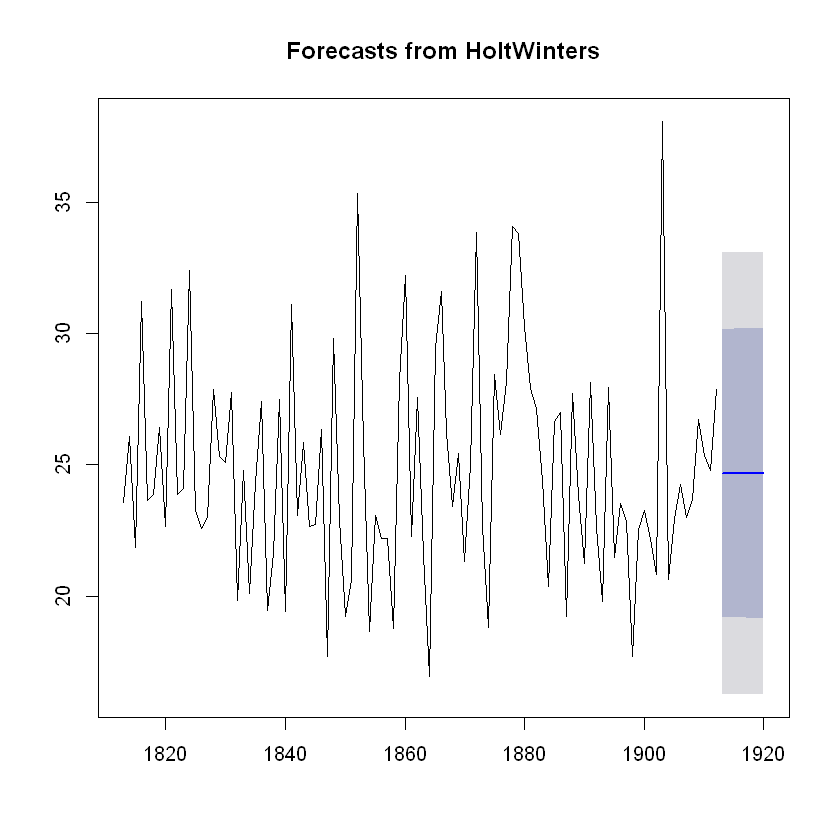

In [124]:
forecast:::plot.forecast(rainseriesforecasts2)

Here the forecasts for 1913-1920 are plotted as a blue line, the 80% prediction interval as an purple shaded area, and the 95% prediction interval as a gray shaded area.